###  LOGISTIC REGRESSION FOR IMBALANCED DATASET

In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
from sklearn.datasets import make_classification

X,y=make_classification(n_samples=10000,n_features=2,n_redundant=0,n_clusters_per_class=1,weights=[0.99]) ### weights tell that there is a data which is 99 times greater than the other.

In [67]:
from collections import Counter

Counter(y)

Counter({0: 9855, 1: 145})

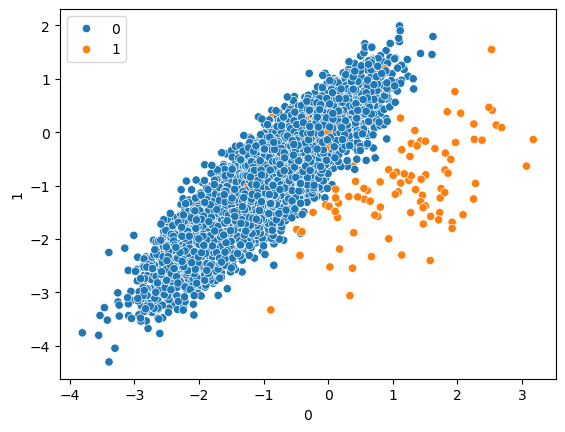

In [68]:
sns.scatterplot(x=pd.DataFrame(X)[0],y=pd.DataFrame(X)[1],hue=y)
plt.show()


### data is not balanced

In [69]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

In [ ]:
penalty=['l1','l2','elasticnet']
c_values=[100,10,1.0,0.1,0.01]
solver=['lbfgs','liblinear','newton-cg','newton-cholesky','sag','saga']
class_weight=[{0:w,1:y} for w in [1,10,50,100] for y in [1,10,50,100]]  ### class weights are used to give all combination of equivalent values

In [71]:
params=dict(penalty=penalty,C=c_values,solver=solver,class_weight=class_weight)

In [72]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

In [73]:
y_pred=model.predict(X_test)

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold

cv=StratifiedKFold()
grid=GridSearchCV(estimator=model,param_grid=params,scoring='accuracy',n_jobs=-1,cv=cv)  ### grid selects the  best options

In [75]:
grid.fit(X_train,y_train)

c:\conda\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
4000 fits failed out of a total of 7200.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
400 fits failed with the following error:
Traceback (most recent call last):
  File "c:\conda\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\conda\Lib\site-packages\sklearn\base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\conda\Lib\site-packages\sklearn\linear_model\_logistic.py", line 1194, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
        

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [100, 10, 1.0, 0.1, 0.01],
                         'class_weight': [{0: 1, 1: 1}, {0: 1, 1: 10},
                                          {0: 1, 1: 50}, {0: 1, 1: 100},
                                          {0: 10, 1: 1}, {0: 10, 1: 10},
                                          {0: 10, 1: 50}, {0: 10, 1: 100},
                                          {0: 50, 1: 1}, {0: 50, 1: 10},
                                          {0: 50, 1: 50}, {0: 50, 1: 100},
                                          {0: 100, 1: 1}, {0: 100, 1: 10},
                                          {0: 100, 1: 50}, {0: 100, 1: 100}],
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['lbfgs', 'liblinear', 'newton-cg',
                                    'newton-cholesky', 'sag', 'saga']},
             scoring='accuracy')

In [76]:
grid.best_params_

{'C': 100, 'class_weight': {0: 10, 1: 50}, 'penalty': 'l1', 'solver': 'saga'}

In [77]:
grid.best_score_

0.9930666666666668

In [78]:
grid.best_estimator_

LogisticRegression(C=100, class_weight={0: 10, 1: 50}, penalty='l1',
                   solver='saga')

In [79]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

score=accuracy_score(y_pred,y_test)
print(score)
print(confusion_matrix(y_pred,y_test))
print(classification_report(y_pred,y_test))

0.9952
[[2472   12]
 [   0   16]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2484
           1       0.57      1.00      0.73        16

    accuracy                           1.00      2500
   macro avg       0.79      1.00      0.86      2500
weighted avg       1.00      1.00      1.00      2500

